In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img,img_to_array
#Google Driveと接続
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# トレーニング用の画像データが格納されているディレクトリのパス
train_data_dir = "/content/drive/MyDrive/馬識別/train"

# トレーニング用の画像データの前処理を行うためのImageDataGeneratorのインスタンスを作成
# rescaleにより画像のピクセル値を0～1の範囲に正規化。これによりモデルの学習効率が向上。
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)

# flow_from_directoryメソッドを使用してトレーニング用のデータジェネレータを作成
# train_data_dirから画像を読み込み、指定されたtarget_size（128x128ピクセル）にリサイズ
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (128, 128))

# 検証用の画像データが格納されているディレクトリのパス
valid_data_dir = "/content/drive/MyDrive/馬識別/val"

# 検証用の画像データの前処理を行うためのImageDataGeneratorのインスタンスを作成
# こちらもトレーニングデータと同様にrescaleを行う
valid_datagen = ImageDataGenerator(rescale = 1.0 / 255)

# flow_from_directoryメソッドを使用して検証用のデータジェネレータを作成
# valid_data_dirから画像を読み込み、同じく128x128ピクセルにリサイズ
valid_generator = valid_datagen.flow_from_directory(valid_data_dir,
                                                    target_size = (128, 128))
print(train_generator.class_indices)

Found 160 images belonging to 2 classes.
Found 45 images belonging to 2 classes.
{'kitasan': 0, 'umasan': 1}


In [3]:
#モデルを構築
model=Sequential()#モデルオブジェクト（ネットワーク）を定義
#model.add()で要素を追加

model.add(Conv2D(128,(6,6),input_shape=(128,128,3)))#入力が128x128x3チャンネル、3x3のフィルタを32個用意
model.add(Activation('relu'))#活性化関数
model.add(MaxPool2D(pool_size=(4,4)))#2x2のプーリングサイズ
model.add(Conv2D(128,(6,6),input_shape=(128,128,3)))#入力が128x128x3チャンネル、3x3のフィルタを32個用意
model.add(Activation('relu'))#活性化関数
model.add(MaxPool2D(pool_size=(4,4)))#2x2のプーリングサイズ

model.add(Flatten()) #一次元ベクトルにする
model.add(Dense(1024))#全結合層
model.add(Activation('relu'))
model.add(Dense(2,activation='softmax'))#softmax層によって出力が確率になる。
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
#検証用データを10%選んで学習を進める　historyを保存しておくと、学習の経過を後で確認可能
history = model.fit(train_generator,batch_size=64,epochs=70,verbose=1,validation_data=valid_generator)


Epoch 1/70
5/5 [==============================] - 75s 14s/step - loss: 0.6899 - accuracy: 0.5437 - val_loss: 0.6760 - val_accuracy: 0.5556
Epoch 2/70
5/5 [==============================] - 3s 731ms/step - loss: 0.6725 - accuracy: 0.5813 - val_loss: 0.6724 - val_accuracy: 0.5556
Epoch 3/70
5/5 [==============================] - 4s 895ms/step - loss: 0.6636 - accuracy: 0.5688 - val_loss: 0.6795 - val_accuracy: 0.7111
Epoch 4/70
5/5 [==============================] - 4s 931ms/step - loss: 0.6588 - accuracy: 0.6125 - val_loss: 0.6832 - val_accuracy: 0.5556
Epoch 5/70
5/5 [==============================] - 3s 706ms/step - loss: 0.6538 - accuracy: 0.6250 - val_loss: 0.6597 - val_accuracy: 0.5556
Epoch 6/70
5/5 [==============================] - 4s 856ms/step - loss: 0.6397 - accuracy: 0.6250 - val_loss: 0.6571 - val_accuracy: 0.5556
Epoch 7/70
5/5 [==============================] - 3s 676ms/step - loss: 0.6489 - accuracy: 0.5375 - val_loss: 0.6502 - val_accuracy: 0.5556
Epoch 8/70
5/5 [=====

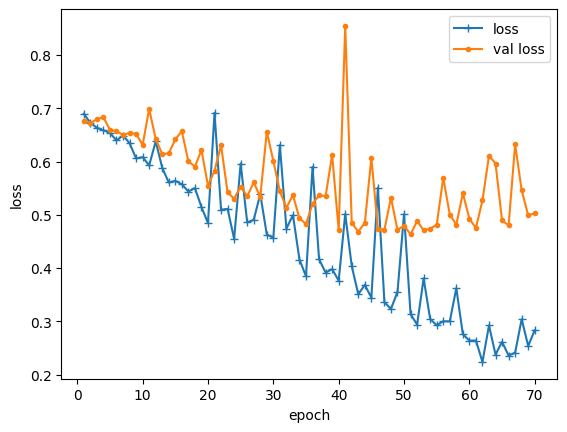

In [4]:
import matplotlib.pyplot as plt

loss = history.history["loss"]

val_loss = history.history["val_loss"]
learning_count = len(loss)+1

plt.plot(range(1,learning_count), loss, marker = "+", label = "loss")
plt.plot(range(1,learning_count), val_loss, marker = ".", label = "val loss")
plt.legend(loc="best") #凡例を表示（bestとするとできるだけ重ならないようになる）
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [5]:
test_data_dir = "/content/drive/MyDrive/馬識別/test"
#データ拡張に使用したもの
test_datagen = ImageDataGenerator(rescale = 1.0 / 255) #rescaleにより画像の値を0～1に
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                    target_size = (128,128))

Found 30 images belonging to 2 classes.


In [6]:
score=model.evaluate(test_generator,verbose=1)

1/1 [==============================] - 1s 1s/step - loss: 0.3070 - accuracy: 0.8667


In [ ]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt


# img = cv2.imread("/content/drive/MyDrive/馬識別/test/uma.test/000064.jpg")
# img = cv2.imread("/content/drive/MyDrive/馬識別/test/kita.test/000010.jpg")
img = cv2.imread("/content/drive/MyDrive/images/000106.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#OpenCVはBGRの順でカラーチャンネルが並んでいるが、kerasではRGBなので、チャンネルを並べ直している。

plt.imshow(img)
plt.axis("off")
plt.show()

In [9]:
img = cv2.resize(img,(128,128)) #画像サイズを128x128に変更する。（学習の時と同じ形にする。）
import numpy as np
img_norm=img/255.0 #画素値を0-255を0-1の範囲に変換する。（学習の時と同じ形にする。）
x = np.expand_dims(img_norm, axis=0) # kerasに入力するために、画像の形を(128, 128, 3)→(1, 128, 128, 3)にしている。
model_output=model.predict(x) #推論
labels=["キタサンブラック","そこらの馬"]
for i in range(len(model_output[0])):
  print(labels[i],"の確率:",model_output[0][i])

predicted = model_output.argmax() #argmax()により、最も大きいクラスが抽出される。例えばcats:0.3、dogs:0.7ならdogs(1)となり、cats:0.51、dogs:0.49ならcats(0)となる。

# アウトプット正答率
print("予測結果:",labels[predicted])

1/1 [==============================] - 0s 18ms/step
！！！！！！推し！！！！！ の確率: 0.8514094
そこらの馬 の確率: 0.14859067
予測結果: ！！！！！！推し！！！！！
